#Introduction to PyTorch

> **Here is a very good reference tutorial video [youtube](https://www.youtube.com/watch?v=IC0_FRiX-sw). We will refer to some part of the video during in this workshop.**

PyTorch is a library for Python programs that facilitates building deep learning projects, it is similar to Numpy, but with strong GPU acceleration.

PyTorch emphasizes flexibility and allows deep learning models to be expressed in Python.

Here we import necessary python packages which will be useful for the later part of the tutorial.

In [184]:
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [185]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

import torchtext
from torchtext.data import get_tokenizer

from torch_geometric.data import Data
from torch_geometric.transforms import RandomNodeSplit as nodeSplit
from torch_geometric.utils.convert import to_networkx
from torch_geometric.nn import GCNConv

import networkx as nx

import json
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [186]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 1. Tensor

A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that a PyTorch Tensor can run on either CPU or GPU. 

## 1.1 Initializing a Tensor

In [187]:
#Preambles
#numpy arrays, mathematical expressions etc

import random
#List
digits = [2,4,6,8,10]
sample = random.sample(range(0,100), 10)
print(digits)
print(sample)
print(sum(digits))

#numpy array
array = np.random.rand(3,2)
print(array)

#numpy array from list
array1 = np.array(sample)
array1

[2, 4, 6, 8, 10]
[40, 44, 91, 7, 13, 85, 43, 58, 12, 32]
30
[[0.19264523 0.7856857 ]
 [0.66173945 0.84229509]
 [0.56922952 0.9654574 ]]


array([40, 44, 91,  7, 13, 85, 43, 58, 12, 32])

We have four different way to initialize a tensor.

In [188]:
# 1. with random or constant values

In [189]:
x = torch.rand(5, 3)

In [190]:
print(x)

tensor([[0.7658, 0.7950, 0.9892],
        [0.7823, 0.3793, 0.3346],
        [0.1594, 0.0906, 0.5588],
        [0.8357, 0.2935, 0.3931],
        [0.1426, 0.9513, 0.5351]])


In [191]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [192]:
x = torch.ones(5, 3, dtype=torch.long)

In [193]:
print(x)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])


In [194]:
# 2. from a list

In [195]:
data = [[1, 2], [3, 4]]

In [196]:
x_data = torch.tensor(data)

In [197]:
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [198]:
# 3. from a numpy array

In [199]:
np_array = np.array(data)

In [200]:
np_array

array([[1, 2],
       [3, 4]])

In [201]:
x_np = torch.from_numpy(np_array)

In [202]:
print(x_np)

tensor([[1, 2],
        [3, 4]])


In [203]:
# 4. from another tensor
# The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [204]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data

In [205]:
print(x_ones)

tensor([[1, 1],
        [1, 1]])


In [206]:
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data

In [207]:
print(x_rand)

tensor([[0.1106, 0.7542],
        [0.6530, 0.2495]])


There are three attributes of tensor: **shape**, **datatype**, and the **device** on which they are stored. By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using .to method (after checking for GPU availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!

In [208]:
print(f"Shape of tensor: {x_rand.shape}")
print(f"Datatype of tensor: {x_rand.dtype}")
print(f"Device tensor is stored on: {x_rand.device}")

Shape of tensor: torch.Size([2, 2])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [209]:
#Check what device is available
torch.cuda.is_available()

True

**Switch from CPU to GPU:**

> In the top left, click on *runtime*, then click on *change runtime type*. Then click on *change hardware accelerator* and choose `GPU`. Finally, click on save.

In [210]:
torch.cuda.is_available()

True

In [211]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

In [212]:
device

device(type='cuda')

In [213]:
x_rand = torch.rand_like(x_data, dtype=torch.float, device=device)

In [214]:
print(f"Device tensor is stored on: {x_rand.device}")

Device tensor is stored on: cuda:0


In [215]:
print(f"Device tensor is stored on: {x_ones.device}")

Device tensor is stored on: cpu


In [216]:
x_ones = x_ones.to(device)

In [217]:
print(f"Device tensor is stored on: {x_ones.device}")

Device tensor is stored on: cuda:0


## 1.2 Operations on Tensors

We already know how to initialize a tensor, then we can do some operations on tensors.

A lot of basic operations are supported by tensors.

In [218]:
x= torch.rand(2, 3)

In [219]:
print(x)

tensor([[0.7791, 0.3513, 0.8330],
        [0.7707, 0.9183, 0.0943]])


In [220]:
y = torch.rand(2, 3)

In [221]:
print(y)

tensor([[0.2525, 0.8161, 0.4476],
        [0.0064, 0.9133, 0.2155]])


In [222]:
print(x + y)

tensor([[1.0316, 1.1674, 1.2806],
        [0.7771, 1.8316, 0.3098]])


In [223]:
print(torch.add(x, y))

tensor([[1.0316, 1.1674, 1.2806],
        [0.7771, 1.8316, 0.3098]])


In [224]:
z1 = x + y
z2 = torch.add(x, y)
z3 = torch.rand_like(x)
torch.add(x, y, out=z3) #overwriting the result on z3

tensor([[1.0316, 1.1674, 1.2806],
        [0.7771, 1.8316, 0.3098]])

In [225]:
z1

tensor([[1.0316, 1.1674, 1.2806],
        [0.7771, 1.8316, 0.3098]])

In [226]:
z2

tensor([[1.0316, 1.1674, 1.2806],
        [0.7771, 1.8316, 0.3098]])

In [227]:
z3

tensor([[1.0316, 1.1674, 1.2806],
        [0.7771, 1.8316, 0.3098]])

In [228]:
z1 = x * y
z2 = x.mul(y)

z3 = torch.rand_like(x)
torch.mul(x, y, out=z3)

tensor([[0.1967, 0.2867, 0.3728],
        [0.0049, 0.8386, 0.0203]])

In [229]:
z1

tensor([[0.1967, 0.2867, 0.3728],
        [0.0049, 0.8386, 0.0203]])

In [230]:
z2

tensor([[0.1967, 0.2867, 0.3728],
        [0.0049, 0.8386, 0.0203]])

In [231]:
z3

tensor([[0.1967, 0.2867, 0.3728],
        [0.0049, 0.8386, 0.0203]])

In [232]:
# resize or reshape by torch.view

In [233]:
x

tensor([[0.7791, 0.3513, 0.8330],
        [0.7707, 0.9183, 0.0943]])

In [234]:
x1 = x.view(6)

In [235]:
x1

tensor([0.7791, 0.3513, 0.8330, 0.7707, 0.9183, 0.0943])

In [236]:
x1 = x.view(3, 2)

In [237]:
x1

tensor([[0.7791, 0.3513],
        [0.8330, 0.7707],
        [0.9183, 0.0943]])

In [238]:
x2 = x.view(2, -1) #-1 infers a new dimension based to match original dimension.

In [239]:
x2

tensor([[0.7791, 0.3513, 0.8330],
        [0.7707, 0.9183, 0.0943]])

There are over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are comprehensively described [here](https://pytorch.org/docs/stable/torch.html)

## 1.3 Bridge with NumPy

In [240]:
# Numpy to Tensor

In [241]:
n1 = np.ones(5)
t1 = torch.from_numpy(n1)

In [242]:
n1

array([1., 1., 1., 1., 1.])

In [243]:
t1

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [244]:
# Tensor to Numpy

In [245]:
t2 = torch.ones(5)
n2 = t2.numpy()

In [246]:
t2

tensor([1., 1., 1., 1., 1.])

In [247]:
n2

array([1., 1., 1., 1., 1.], dtype=float32)

Tensors on the CPU and NumPy arrays can share their **underlying memory locations**, and changing one will change the other.

In [248]:
t1.add_(1)
print(f"t1: {t1}")
print(f"n1: {n1}")

t1: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n1: [2. 2. 2. 2. 2.]


In [249]:
np.add(n2, 3, out=n2)
print(f"t2: {t2}")
print(f"n2: {n2}")

t2: tensor([4., 4., 4., 4., 4.])
n2: [4. 4. 4. 4. 4.]


# 2. Autograd

torch.autograd is PyTorch’s automatic **differentiation** engine that powers **neural network training**. 

The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your **backprop** is defined by how your code is run, and that every single iteration can be different.

The gradient is like derivative but in vector form. It is important to calculate the loss function in neural networks. **But it is impractical** to calculate gradients of such large composite functions by solving mathematical equations because of the high number of dimensions. Luckily, PyTorch can find this gradient numerically in a matter of seconds!

gradient is the **core** of backpropagation.


In [250]:
x = torch.tensor([1., 2.], requires_grad = True) # signals to autograd that every operation on the expression should be tracked.
print(x.grad)

None


In [251]:
y = x ** 2 #assume to be error. gradient = dy/dx = 2x = [2,4]. with autograd, this gradient is automatically tracked. 

In [252]:
y.sum().backward() 

We often apply backward on loss, and the loss the sum of several parts, that why we call sum() here.

In [253]:
print(x.grad) #gradients are now deposited in x.grad

tensor([2., 4.])


In [254]:
with torch.no_grad():
    z = x ** 2

In [255]:
z

tensor([1., 4.])

We can see the difference between y and z here, if we specify torch.no_grad, we can't call backward which is very important for neural network training. So, if we want to know the performance of this model without updating its parameter, we will specify torch.no_grad.

# 3. A simple PyTorch Model example 

In [256]:
import math
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) #generate 100 equally spaced values between -1 and 1. unsqueeze - changes dimension
y = x.pow(2) + 0.3*torch.rand(x.size()) 

In [257]:
x.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

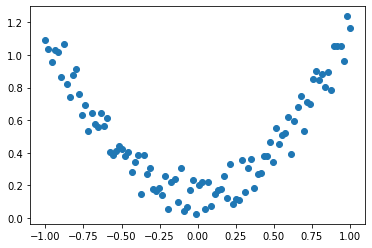

In [258]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In PyTorch a nice way to build a network is by creating a new class for the network we wish to build. 

In [259]:
class Net(torch.nn.Module):  
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__() 
        self.layer1 = torch.nn.Linear(n_feature, n_hidden)   
        self.layer2 = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):  
        x = F.relu(self.layer1(x))      
        x = self.layer2(x)            
        return x

In [260]:
net = Net(n_feature=1, n_hidden=10, n_output=1)

In [261]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) 

In [262]:
loss_func = torch.nn.MSELoss() 

In [263]:
for i in range(100):
    prediction = net(x)    
    loss = loss_func(prediction, y)    

    optimizer.zero_grad()   # set the stored backprop gradients to 0
    loss.backward()          
    optimizer.step()    # Performs a single optimization step (parameter update).
    if i % 10 == 0:
        print("Loss=%.4f " % loss.item())

Loss=0.1942 
Loss=0.1042 
Loss=0.0896 
Loss=0.0768 
Loss=0.0647 
Loss=0.0534 
Loss=0.0432 
Loss=0.0343 
Loss=0.0271 
Loss=0.0215 


We can find that our model is working now, with the increase of iterations, the loss decreased.

To have a more intuitive feeling about the training process of our model, I also plot the predictions of our model here.

0.41782885789871216


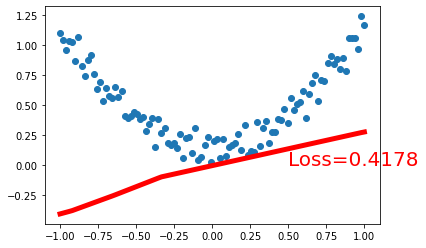

0.1076914593577385


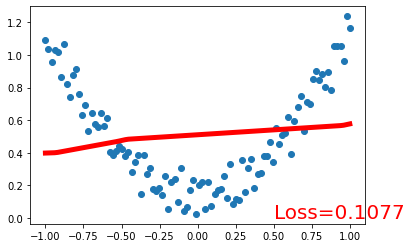

0.10284586250782013


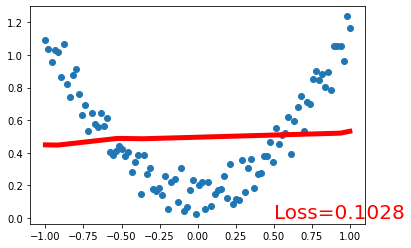

0.09998273849487305


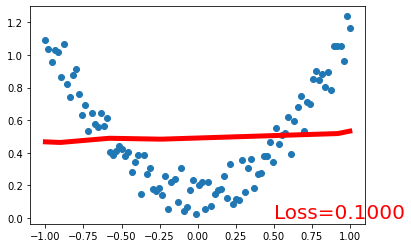

0.09765460342168808


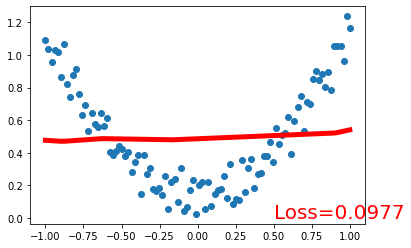

0.09556093066930771


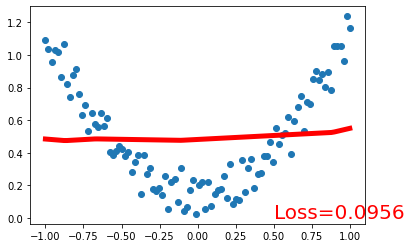

0.09349958598613739


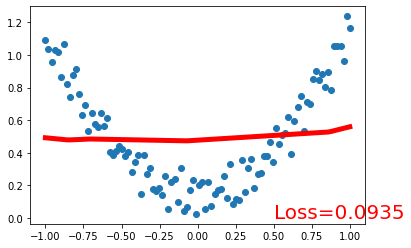

0.0913732722401619


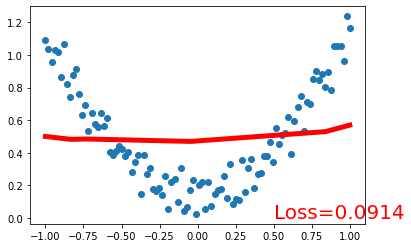

0.08904922753572464


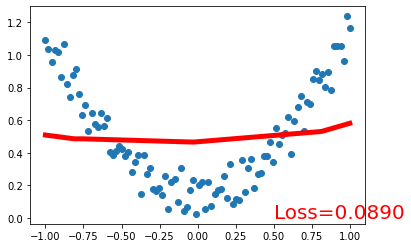

0.08638198673725128


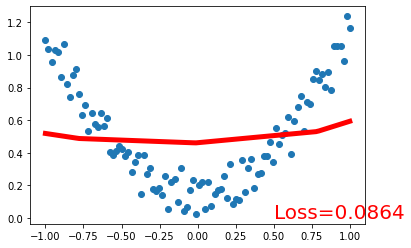

0.08330240100622177


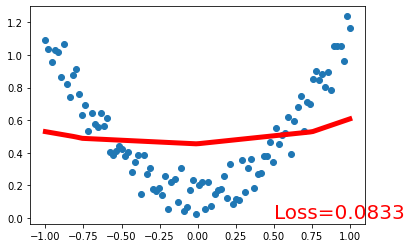

0.0797039344906807


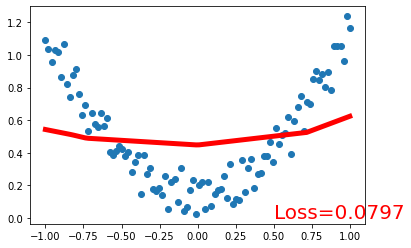

0.07556730508804321


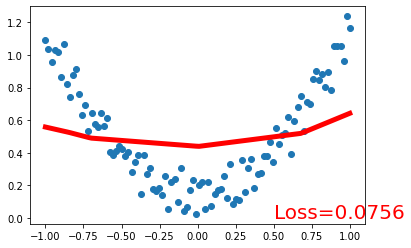

0.07082998752593994


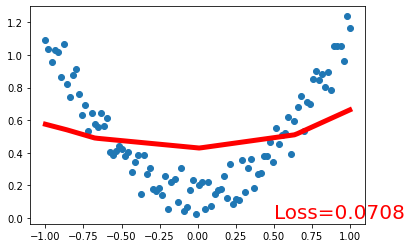

0.06550704687833786


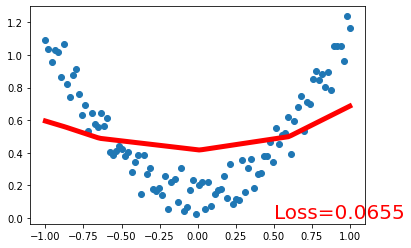

0.05965520814061165


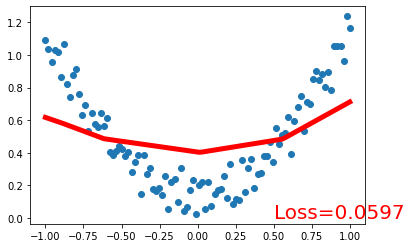

0.053357332944869995


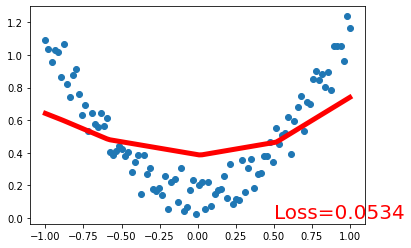

0.046804022043943405


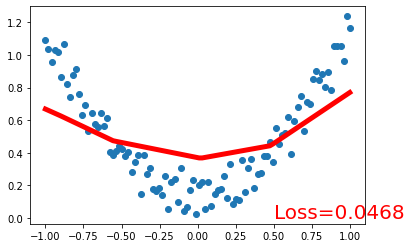

0.04031234607100487


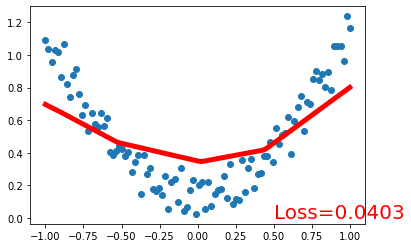

0.03414478898048401


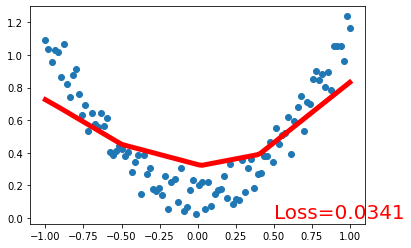

In [264]:
net = Net(n_feature=1, n_hidden=10, n_output=1)
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) 
loss_func = torch.nn.MSELoss() 

plt.ion() 
plt.show()

for t in range(100):
    prediction = net(x)    
    loss = loss_func(prediction, y)    

    optimizer.zero_grad()   
    loss.backward()         
    optimizer.step()

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        print(loss.item())
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

Please remember to call optimizer.zero_grad() before backprop, otherwise, the gradient would be a combination of the old gradient, which you have already used to update your model parameters.

For more details about optimizer and loss function, you can check this official tutorial provided by Pytorch ([optimizer](https://pytorch.org/docs/stable/optim.html), [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)). 


#3.1 Introduction to PyTorch Models. Another Example

Reference tutotrial video, beginning from [10:00](https://www.youtube.com/watch?v=IC0_FRiX-sw&t=600s).





In [265]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

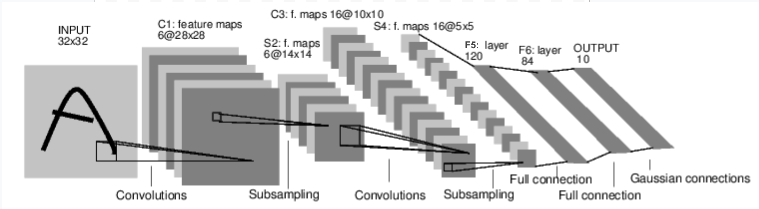


*Figure: LeNet-5*

Above is a diagram of LeNet-5, one of the earliest convolutional neural
nets, and one of the drivers of the explosion in Deep Learning. It was
built to read small images of handwritten numbers (the MNIST dataset),
and correctly classify which digit was represented in the image.

Here’s the abridged version of how it works:

-  Layer C1 is a convolutional layer, meaning that it scans the input
   image for features it learned during training. It outputs a map of
   where it saw each of its learned features in the image. This
   “activation map” is downsampled in layer S2.
-  Layer C3 is another convolutional layer, this time scanning C1’s
   activation map for *combinations* of features. It also puts out an
   activation map describing the spatial locations of these feature
   combinations, which is downsampled in layer S4.
-  Finally, the fully-connected layers at the end, F5, F6, and OUTPUT,
   are a *classifier* that takes the final activation map, and
   classifies it into one of ten bins representing the 10 digits.

How do we express this simple neural network in code?




In [266]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

Looking over this code, you should be able to spot some structural
similarities with the diagram above.

This demonstrates the structure of a typical PyTorch model: 

-  It inherits from ``torch.nn.Module`` - modules may be nested - in fact,
   even the ``Conv2d`` and ``Linear`` layer classes inherit from
   ``torch.nn.Module``.
-  A model will have an ``__init__()`` function, where it instantiates
   its layers, and loads any data artifacts it might
   need (e.g., an NLP model might load a vocabulary).
-  A model will have a ``forward()`` function. This is where the actual
   computation happens: An input is passed through the network layers
   and various functions to generate an output.
-  Other than that, you can build out your model class like any other
   Python class, adding whatever properties and methods you need to
   support your model’s computation.

Let’s instantiate this object and run a sample input through it.




In [267]:
net = LeNet()
print(net)                         # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.0808, -0.0158,  0.0729,  0.0162,  0.0425,  0.0120, -0.0770, -0.0128,
         -0.0478, -0.0641]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


There are a few important things happening above:

First, we instantiate the ``LeNet`` class, and we print the ``net``
object. A subclass of ``torch.nn.Module`` will report the layers it has
created and their shapes and parameters. This can provide a handy
overview of a model if you want to get the gist of its processing.

Below that, we create a dummy input representing a 32x32 image with 1
color channel. Normally, you would load an image tile and convert it to
a tensor of this shape.

You may have noticed an extra dimension to our tensor - the *batch
dimension.* PyTorch models assume they are working on *batches* of data
- for example, a batch of 16 of our image tiles would have the shape
``(16, 1, 32, 32)``. Since we’re only using one image, we create a batch
of 1 with shape ``(1, 1, 32, 32)``.

We ask the model for an inference by calling it like a function:
``net(input)``. The output of this call represents the model’s
confidence that the input represents a particular digit. (Since this
instance of the model hasn’t learned anything yet, we shouldn’t expect
to see any signal in the output.) Looking at the shape of ``output``, we
can see that it also has a batch dimension, the size of which should
always match the input batch dimension. If we had passed in an input
batch of 16 instances, ``output`` would have a shape of ``(16, 10)``.

## Datasets and Dataloaders
*Follow along with the reference video beginning at [14:00](https://www.youtube.com/watch?v=IC0_FRiX-sw&t=840s).*

Below, we’re going to demonstrate using one of the ready-to-download,
open-access datasets from TorchVision, how to transform the images for
consumption by your model, and how to use the DataLoader to feed batches
of data to your model.

The first thing we need to do is transform our incoming images into a
PyTorch tensor.




In [268]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Here, we specify two transformations for our input:

-  ``transforms.ToTensor()`` converts images loaded by Pillow into 
   PyTorch tensors.
-  ``transforms.Normalize()`` adjusts the values of the tensor so
   that their average is zero and their standard deviation is 0.5. Most
   activation functions have their strongest gradients around x = 0, so
   centering our data there can speed learning.

There are many more transforms available, including cropping, centering,
rotation, and reflection.

Next, we’ll create an instance of the CIFAR10 dataset. This is a set of
32x32 color image tiles representing 10 classes of objects: 6 of animals
(bird, cat, deer, dog, frog, horse) and 4 of vehicles (airplane,
automobile, ship, truck):




In [269]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


<div class="alert alert-info"><h4>Note</h4><p>When you run the cell above, it may take a little time for the 
     dataset to download.</p></div>

This is an example of creating a dataset object in PyTorch. Downloadable
datasets (like CIFAR-10 above) are subclasses of
``torch.utils.data.Dataset``. ``Dataset`` classes in PyTorch include the
downloadable datasets in TorchVision, Torchtext, and TorchAudio, as well
as utility dataset classes such as ``torchvision.datasets.ImageFolder``,
which will read a folder of labeled images. You can also create your own
subclasses of ``Dataset``.

When we instantiate our dataset, we need to tell it a few things:

-  The filesystem path to where we want the data to go. 
-  Whether or not we are using this set for training; most datasets
   will be split into training and test subsets.
-  Whether we would like to download the dataset if we haven’t already.
-  The transformations we want to apply to the data.

Once your dataset is ready, you can give it to the ``DataLoader``:




In [270]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

A ``Dataset`` subclass wraps access to the data, and is specialized to
the type of data it’s serving. The ``DataLoader`` knows *nothing* about
the data, but organizes the input tensors served by the ``Dataset`` into
batches with the parameters you specify.

In the example above, we’ve asked a ``DataLoader`` to give us batches of
4 images from ``trainset``, randomizing their order (``shuffle=True``),
and we told it to spin up two workers to load data from disk.

It’s good practice to visualize the batches your ``DataLoader`` serves:




horse   dog  ship  deer


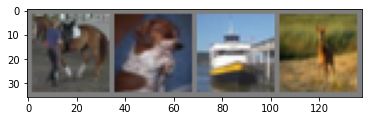

In [271]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Running the above cell should show you a strip of four images, and the
correct label for each.

## Training Your PyTorch Model
*Follow along with the video beginning at [17:10](https://www.youtube.com/watch?v=IC0_FRiX-sw&t=1030s).*

Let’s put all the pieces together, and train a model:




In [272]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

First, we’ll need training and test datasets. If you haven’t already,
run the cell below to make sure the dataset is downloaded. (It may take
a minute.)




In [273]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


We’ll run our check on the output from ``DataLoader``:




horse   car truck  bird


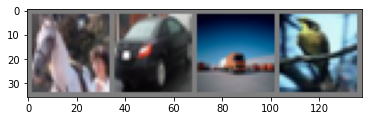

In [274]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

This is the model we’ll train. If it looks familiar, that’s because it’s
a variant of LeNet - discussed earlier in the reference video - adapted for
3-color images.




In [275]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

The last ingredients we need are a loss function and an optimizer:




In [276]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

The loss function, as discussed earlier in the video at the beginning of the tutorial, is a measure of
how far from our ideal output the model’s prediction was. Cross-entropy
loss is a typical loss function for classification models like ours.

The **optimizer** is what drives the learning. Here we have created an
optimizer that implements *stochastic gradient descent,* one of the more
straightforward optimization algorithms. Besides parameters of the
algorithm, like the learning rate (``lr``) and momentum, we also pass in
``net.parameters()``, which is a collection of all the learning weights
in the model - which is what the optimizer adjusts.

Finally, all of this is assembled into the training loop. Go ahead and
run this cell, as it will likely take a few minutes to execute:




In [277]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.204
[1,  4000] loss: 1.878
[1,  6000] loss: 1.681
[1,  8000] loss: 1.577
[1, 10000] loss: 1.520
[1, 12000] loss: 1.472
[2,  2000] loss: 1.434
[2,  4000] loss: 1.377
[2,  6000] loss: 1.343
[2,  8000] loss: 1.314
[2, 10000] loss: 1.304
[2, 12000] loss: 1.243
Finished Training


Here, we are doing only **2 training epochs** (line 1) - that is, two
passes over the training dataset. Each pass has an inner loop that
**iterates over the training data** (line 4), serving batches of
transformed input images and their correct labels.

**Zeroing the gradients** (line 9) is an important step. Gradients are
accumulated over a batch; if we do not reset them for every batch, they
will keep accumulating, which will provide incorrect gradient values,
making learning impossible.

In line 12, we **ask the model for its predictions** on this batch. In
the following line (13), we compute the loss - the difference between
``outputs`` (the model prediction) and ``labels`` (the correct output).

In line 14, we do the ``backward()`` pass, and calculate the gradients
that will direct the learning.

In line 15, the optimizer performs one learning step - it uses the
gradients from the ``backward()`` call to nudge the learning weights in
the direction it thinks will reduce the loss.

The remainder of the loop does some light reporting on the epoch number,
how many training instances have been completed, and what the collected
loss is over the training loop.

**When you run the cell above,** you should see something like this:
```

   [1,  2000] loss: 2.235
   [1,  4000] loss: 1.940
   [1,  6000] loss: 1.713
   [1,  8000] loss: 1.573
   [1, 10000] loss: 1.507
   [1, 12000] loss: 1.442
   [2,  2000] loss: 1.378
   [2,  4000] loss: 1.364
   [2,  6000] loss: 1.349
   [2,  8000] loss: 1.319
   [2, 10000] loss: 1.284
   [2, 12000] loss: 1.267
   Finished Training

   ```

Note that the loss is monotonically descending, indicating that our
model is continuing to improve its performance on the training dataset.

As a final step, we should check that the model is actually doing
*general* learning, and not simply “memorizing” the dataset. This is
called **overfitting,** and usually indicates that the dataset is too
small (not enough examples for general learning), or that the model has
more learning parameters than it needs to correctly model the dataset.

This is the reason datasets are split into training and test subsets -
to test the generality of the model, we ask it to make predictions on
data it hasn’t trained on:




In [278]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


If you followed along, you should see that the model is roughly 50%
accurate at this point. That’s not exactly state-of-the-art, but it’s
far better than the 10% accuracy we’d expect from a random output. This
demonstrates that some general learning did happen in the model.




# 4. Sentiment Analysis with RNN

We have already seen feed-forward networks where inputs are multiplied by a weight and then bias is added to that and so on and finally we get output from the last layer. But the problem with these types of networks is they do not store memory and cannot be used in sequential data. This is the reason Recurrent Neural Networks (RNN) was introduced.

In this part, we will be using PyTorch to train a RNN to do sentiment analysis.

Prepare data

In [279]:
#mount google drive
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [1]:
prefix = '/content/gdrive/MyDrive/'
# modify "customized_path_to_your_workshop_data" here to where your data is
customized_path_to_your_workshop_data = 'files/workshop_2/'
train_path = prefix + customized_path_to_your_workshop_data + 'sentiment_analysis/train.csv'
test_path = prefix + customized_path_to_your_workshop_data + 'sentiment_analysis/test.csv'

In [281]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [282]:
train_df.head(5)

,sentiment,review
0,positive,one reviewer mentioned watching oz episode hoo...
1,positive,wonderful little production filming technique ...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake think zombie ...
4,positive,petter matteis love time money visually stunni...


In [283]:
train_set = list(train_df.to_records(index=False))
test_set = list(test_df.to_records(index=False))

In [284]:
train_set[:5]

[('positive', 'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill priso

In [285]:
len(train_set)

20000

In [286]:
len(test_set)

9999

In [287]:
train_df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [288]:
train_df.sentiment.value_counts()

negative    10083
positive     9917
Name: sentiment, dtype: int64

In [289]:
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer("This is just a test?")

In [290]:
tokens

['this', 'is', 'just', 'a', 'test', '?']

In [291]:
train_set = [(sentiment, tokenizer(review)) for sentiment, review in train_set]
test_set = [(sentiment, tokenizer(review)) for sentiment, review in test_set]

In [292]:
len(test_set)

9999

In [293]:
#train_set[:1]

## 4.1 embedding

Firstly, we need to build our vocabulary.

In [294]:
word_vocab = set()
word_vocab.add("<Start>")
word_vocab.add("<End>")
word_vocab.add("<Pad>")

for record in [train_set, test_set]:
    for label, sen in record:
        for word in sen:
            word_vocab.add(word)    

In [295]:
len(word_vocab)

107579

In [296]:
list(word_vocab)[:10]

['gabriel',
 'lefler',
 'girlsmy',
 'mads',
 'usines',
 'genresee',
 'unisten',
 'henna',
 'willowtotally',
 'waltersrealizes']

In [297]:
word2id = {word: id for id, word in enumerate(word_vocab)}

In [298]:
len(word2id)

107579

In [299]:
#word2id

In [300]:
word2id['hotties']

23003

In [301]:
word2id['<Start>']

17850

The input of RNN should have the same size, which means that sentences must be of equal length, but this is not true. So we will set a maximum length. For example, we set the maximum length of the input sequence is 100, which means each sentence has at most 100 words, if the length of a sentence is less than 100, we should fill it with a pad; if the length of a sentence is greater than the maximum length, we should truncate the sentence to maximum length.

In [302]:
def encode_and_pad(sen, max_len):
    start = [word2id["<Start>"]]
    end = [word2id["<End>"]]
    pad = [word2id["<Pad>"]]

    if len(sen) < max_len - 2: # 2 word for Start and End
        n_pads = max_len - 2 - len(sen)
        encoded = [word2id[w] for w in sen]
        return start + encoded + end + pad * n_pads 
    else: 
        encoded = [word2id[w] for w in sen]
        truncated = encoded[:max_len - 2]
        return start + truncated + end

In [303]:
def label_map(label):
    if label == "negative":
        return 0
    elif label == "positive":
        return 1

In [304]:
train_encoded = [(encode_and_pad(sen, 100), label_map(label)) for label, sen in train_set]
test_encoded = [(encode_and_pad(sen, 100), label_map(label)) for label, sen in test_set]

In [305]:
batch_size = 64

train_x = np.array([sen for sen, label in train_encoded])
train_y = np.array([label for sen, label in train_encoded])
test_x = np.array([sen for sen, label in test_encoded])
test_y = np.array([label for sen, label in test_encoded])

train_ds = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
test_ds = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

train_loader = DataLoader(train_ds, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_ds, shuffle=True, batch_size=batch_size, drop_last=True)

Notice the parameter drop_last=True. This is used for when the final batch does not have 64 elements. The batch is then incomplete and will cause dimension errors if we feed it into the model. By setting this parameter to True, we avoid this final batch.

## 4.2 model architecture

In [306]:
class RNN_embedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim=50, hidden_size=128, num_layers=2, num_classes=2):
        super().__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.rnn = nn.RNN(embedding_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.rnn(x)
        # out: batch_size, seq_length, hidden_size
        out = out[:, -1, :] # -1 only take the last time step
        # out: batch_size, hidden_size
        out = self.fc(out)
        #out = F.relu(self.fc(out))
        return out

In [307]:
model_embedding = RNN_embedding(len(word2id))
model_embedding = model_embedding.to(device)

In [308]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_embedding.parameters(), lr = 1e-4)

## 4.3 training and testing

In [309]:
def train(model, train_loader, n_epochs, optimizer, criterion, batch_size=64):
    model.train()
    
    for epoch in range(n_epochs):
        train_loss = 0.0
        for i,(data, label) in enumerate(train_loader):
            data, label = data.to(device), label.to(device)
            
            optimizer.zero_grad()
            predictions = model(data)

            loss = criterion(predictions, label)        
            loss.backward()
            optimizer.step()
        
            train_loss += loss.item()
            #if (i+1) % 100 == 0:
            #    print('Epoch: {} \tStep:{} \tTraining Loss: {:.6f} '.format(epoch+1, i+1, loss.item()))
        train_loss = train_loss/(len(train_loader.dataset)//batch_size)
    
        print('Epoch: {} \tTraining Loss: {:.6f} '.format(epoch+1, train_loss))

In [310]:
train(model_embedding, train_loader, 150, optimizer, criterion)

Epoch: 1 	Training Loss: 0.694978 
Epoch: 2 	Training Loss: 0.693192 
Epoch: 3 	Training Loss: 0.692055 
Epoch: 4 	Training Loss: 0.690506 
Epoch: 5 	Training Loss: 0.688342 
Epoch: 6 	Training Loss: 0.685666 
Epoch: 7 	Training Loss: 0.681275 
Epoch: 8 	Training Loss: 0.682120 
Epoch: 9 	Training Loss: 0.673845 
Epoch: 10 	Training Loss: 0.666978 
Epoch: 11 	Training Loss: 0.667385 
Epoch: 12 	Training Loss: 0.665881 
Epoch: 13 	Training Loss: 0.662001 
Epoch: 14 	Training Loss: 0.655957 
Epoch: 15 	Training Loss: 0.669754 
Epoch: 16 	Training Loss: 0.668914 
Epoch: 17 	Training Loss: 0.664436 
Epoch: 18 	Training Loss: 0.660835 
Epoch: 19 	Training Loss: 0.653110 
Epoch: 20 	Training Loss: 0.632084 
Epoch: 21 	Training Loss: 0.618741 
Epoch: 22 	Training Loss: 0.613139 
Epoch: 23 	Training Loss: 0.644057 
Epoch: 24 	Training Loss: 0.617941 
Epoch: 25 	Training Loss: 0.611910 
Epoch: 26 	Training Loss: 0.596427 
Epoch: 27 	Training Loss: 0.583678 
Epoch: 28 	Training Loss: 0.572744 
E

In [311]:
def evaluate(model, test_loader):   
    batch_acc = []
    batch_pre = []
    batch_recall = []
    batch_f1 = []
    for i,(data, label) in enumerate(test_loader):
        data, label = data.to(device), label.to(device)
        
        predictions = model(data)
        #print(predictions)
        pred = [0 if prob[0]> prob[1] else 1 for prob in predictions]
        acc = accuracy_score(label.cpu(), pred)
        pre = precision_score(label.cpu(), pred)
        recall = recall_score(label.cpu(), pred)
        f1 = f1_score(label.cpu(), pred)
        
        batch_acc.append(acc)
        batch_pre.append(pre)
        batch_recall.append(recall)
        batch_f1.append(f1)    
    print('Precision: {:.3f}\tRecall: {:.3f}\tF1:{:.3f}\tAccuracy: {:.3f}'.\
          format(sum(batch_pre)/len(batch_pre), sum(batch_recall)/len(batch_recall),
                 sum(batch_f1)/len(batch_f1), sum(batch_acc)/len(batch_acc)))

In [312]:
evaluate(model_embedding, test_loader)

Precision: 0.748	Recall: 0.665	F1:0.700	Accuracy: 0.712


# 5. Image Classification with CNN

In this part, we will be using PyTorch to train a convolutional neural network to recognize MNIST's handwritten digits

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) is a large dataset of handwritten digits that is commonly used for training various image processing systems. It contains 60,000 training images and 10,000 testing images. 

We can load the MNIST dataset by TorchVision. We use a batch_size of 64 for training and testing on this dataset. The values 0.1307 and 0.3081 used for the Normalize() transformation below are the global mean and standard deviation of the MNIST dataset, after applying the transforms.Normalize, the data would be scaled and shifted to a zero mean and standard deviation of one. Num_workers=2, means we are using 2 subprocesses to asynchronously load data. 

In [313]:
def MNISTloader(path, batch_size=64):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

    train_set = torchvision.datasets.MNIST(root=path, train=True, download=True, transform=transform)
    test_set = torchvision.datasets.MNIST(root=path, train=False, download=True, transform=transform)
    
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)    
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, test_loader

Now let's build our model. We'll use two 2-D convolutional layers followed by two fully-connected (or linear) layers. As activation function we'll choose rectified linear units (ReLUs in short). 

A pooling layer is a new layer added after the convolutional layer. Specifically, after a nonlinearity (e.g. ReLU) has been applied to the feature maps output by a convolutional layer. It's common to add a pooling layer after the convolutional layer for ordering layers within a convolutional neural network that may be repeated one or more times in a given model. The pooling layer operates upon each feature map separately to create a new set of the same number of pooled feature maps. Pooling involves selecting a pooling operation, much like a filter to be applied to feature maps. The size of the pooling operation or filter is smaller than the size of the feature map.

In this model, the size of first convolutional layer's filter is 3 $\times$ 3, and second layer is 5 $\times$ 5, 

size of pooling is 2 $\times$ 2, stride is also 2 $\times$ 2, and it's max-pooling (Max pooling is the most widely used pooling technique since it captures the features of maximum importance with it). 

For more details about pooling, you can check this official tutorial provided by Pytorch ([pooling](https://pytorch.org/docs/stable/nn.html#pooling-layers)).

In [314]:
class CNN_MNIST_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x

One thing we need to be careful is the input of first linear layer. More details about [convolution arithmetic](https://arxiv.org/pdf/1603.07285.pdf).

for convolutional layer,
$$
o = \frac{i - f + 2 *p}{s} + 1
$$
for pooling,
$$o = \lfloor \frac{i - k}{s} \rfloor + 1$$     

conv1: 1 $\times$ 28 $\times$ 28  --> 6 $\times$ 26 $\times$ 26

pooling: 6 $\times$ 26 $\times$ 26 --> 6 $\times$ 13 $\times$ 13

conv2: 6 $\times$ 13 $\times$ 13  --> 16 $\times$ 9 $\times$ 9

pooling: 16 $\times$ 9 $\times$ 9 --> 16 $\times$ 4 $\times$ 4

In [315]:
def train(model, train_loader, n_epochs, optimizer, criterion, batch_size=64):
    model.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        train_loss = 0.0
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            #print("outputs:{}\t lable:{}\t loss:{}".format(outputs, labels, loss))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            running_loss += loss.item()
        train_loss = train_loss/(len(train_loader.dataset)//batch_size)

        print('Epoch: {} \tTraining Loss: {:.6f} '.format(epoch+1, train_loss))

    print('Finished Training')

In [316]:
mnist_train, mnist_test = MNISTloader("./data")
model_mnist = CNN_MNIST_Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_mnist.parameters(), lr=0.001, momentum=0.9)
train(model_mnist, mnist_train, 5, optimizer, criterion)

Epoch: 1 	Training Loss: 2.103421 
Epoch: 2 	Training Loss: 1.731681 
Epoch: 3 	Training Loss: 1.706670 
Epoch: 4 	Training Loss: 1.642637 
Epoch: 5 	Training Loss: 1.541607 
Finished Training


In [317]:
def evaluate(model, test_loader):
    batch_acc = []
    batch_pre = []
    batch_recall = []
    batch_f1 = []
    for data, label in test_loader:
        data = data.to(device)
        label = label.to(device)

        predictions = np.array(model(data).to("cpu").tolist())
        pred_index = np.argmax(predictions, axis=1)
        pred = pred_index.tolist()
        acc = accuracy_score(pred, label.tolist())
        pre = precision_score(pred, label.tolist(), average='micro')
        recall = recall_score(pred, label.tolist(), average='micro')
        f1 = f1_score(pred, label.tolist(), average='micro')

        batch_acc.append(acc)
        batch_pre.append(pre)
        batch_recall.append(recall)
        batch_f1.append(f1)
    print('Precision: {:.3f}\tRecall: {:.3f}\tF1:{:.3f}\tAccuracy: {:.3f}'. \
          format(sum(batch_pre)/len(batch_pre), sum(batch_recall)/len(batch_recall),
                 sum(batch_f1)/len(batch_f1), sum(batch_acc)/len(batch_acc)))

In [318]:
evaluate(model_mnist, mnist_test)

Precision: 0.947	Recall: 0.947	F1:0.947	Accuracy: 0.947


To have a more intuitive feeling about the performance of our model, we can sample some images, and plot these images with their true labels and predicted labels.

In [319]:
examples = enumerate(mnist_test)
batch_idx, (example_data, example_targets) = next(examples)

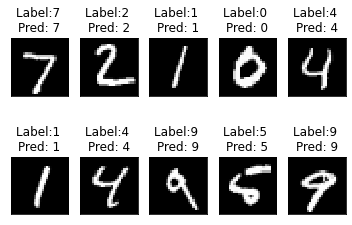

In [320]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  #plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  output = model_mnist(example_data.to(device))
  plt.title("Label:{} \nPred: {}".format(example_targets.data[i].item(), output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])